# Notebook on Visualization of the data

In [1]:
import pandas as pd
import seaborn as sns # plotting library
import matplotlib.pyplot as plt

import numpy as np # library to work with numerical arrays (matrices)

In [2]:
#load cleaned data
file_path = '../data/dataset_clean_1.csv'
df        = pd.read_csv( file_path )
df.head(10)

,t,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected,cell_lbl
0,0.0,Lpp WT,0.431446,0.256032,126.836,217.240,8.0,10.007600,1.0,w1_f1_c1
1,1.0,Lpp WT,0.484533,0.121939,125.335,346.889,0.0,0.000000,0.0,w1_f1_c1
2,2.0,Lpp WT,0.488785,0.115264,125.288,432.361,0.0,0.000000,0.0,w1_f1_c1
3,3.0,Lpp WT,0.478215,0.140332,125.717,346.814,0.0,0.000000,0.0,w1_f1_c1
4,4.0,Lpp WT,0.474289,0.178344,125.518,426.399,1.0,2.296670,1.0,w1_f1_c1
5,5.0,Lpp WT,0.481473,0.135201,125.583,278.538,2.0,1.536940,1.0,w1_f1_c1
6,6.0,Lpp WT,0.470587,0.174567,126.060,482.551,3.0,0.270711,1.0,w1_f1_c1
7,7.0,Lpp WT,0.474153,0.159039,125.744,419.905,2.0,1.152700,1.0,w1_f1_c1
8,8.0,Lpp WT,0.493505,0.106421,142.832,395.935,1.0,0.401700,1.0,w1_f1_c1
9,9.0,Lpp WT,0.513772,0.078543,448.848,743.010,1.0,0.069861,1.0,w1_f1_c1


# Select only long tracks

In [3]:
# this is a bit advanced method. Read more on pandas methods "apply" and "transform" to find more details
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html

# the general idea of the method "transform" is to take dataframe (or series) and based on some function
# turn it (=transform) into a new dataframe (series).
# example:

def is_first_timepoint(t):
    """Thiss function returns True if a value (e.g. of time) is 0."""
    return True if t==0 else False


# it returns booleans because we asekd for this in the function.
df['t'].transform(is_first_timepoint)

0         True
1        False
2        False
3        False
4        False
         ...  
42593    False
42594    False
42595    False
42596    False
42597    False
Name: t, Length: 42598, dtype: bool

In [4]:
# we can use this boolean Series to select only the first time points.
df[ df['t'].transform(is_first_timepoint) ]

# this is a very simple example; but it explainss the idea: transform data.
# The power of this method is that it can also be applied in aggregation/grouping strategies.
# Read more on "split-aaply-combine"; e.g. https://pbpython.com/pandas_transform.html

,t,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected,cell_lbl
0,0.0,Lpp WT,0.431446,0.256032,126.836,217.240,8.0,10.00760,1.0,w1_f1_c1
18,0.0,Lpp WT,0.320009,0.561680,122.675,227.221,5.0,18.39960,1.0,w1_f1_c2
36,0.0,Lpp WT,0.332432,0.617018,127.679,227.276,2.0,3.88601,1.0,w1_f1_c3
52,0.0,Lpp WT,0.380463,0.534189,125.863,259.013,3.0,5.17843,1.0,w1_f1_c4
70,0.0,Lpp WT,0.358430,0.414332,122.671,237.100,5.0,20.99320,1.0,w1_f1_c5
...,...,...,...,...,...,...,...,...,...,...
42485,0.0,Lpp dotA,0.367206,0.367284,126.651,216.745,5.0,7.30919,1.0,w10_f25_c1
42503,0.0,Lpp dotA,0.287958,0.892647,120.039,259.568,3.0,4.78546,1.0,w10_f25_c2
42520,0.0,Lpp dotA,0.343725,0.684250,121.733,233.168,2.0,2.06089,1.0,w10_f25_c3
42538,0.0,Lpp dotA,0.325515,0.608774,128.984,303.719,13.0,15.41300,1.0,w10_f25_c4


### Using the method "transform" in a grouping strategy

In [5]:
# track lengths threshold:
min_tr_length = 18

# lambda function can be declared in-line (without using the "def func_name()" synthax)
# read more about lambda functions. They are not really needed, you can perfectly get away with normal "def" functions.
# the synthax:
# lambda x: True if len(x)>=min_track_length else False
# is equivalent to:
# def fname(x):
#     if len(x)>=min_track_length:
#         return True
#     else:
#         return False


# We do take these steps:
# - group cells by their ids
# - use the transform method on EACH CELL DATAFRAME (and not the full df!!) 
# - find the length of this cell dataframe
# - compare it to the minimal track length and return True if the cell dataframe is long enough
# - this will return boolean Sseries

inds = df.groupby('cell_lbl')['t'].transform(lambda x: True if len(x)>=min_tr_length else False)
df_long_tracks = df[inds]
df_long_tracks.tail() # note that the cell has times up to 17 (from 0 to 17 -> 18 frames)

,t,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected,cell_lbl
42569,13.0,Lpp dotA,0.414511,0.339913,136.581,850.190,5.0,10.8634,1.0,w10_f25_c5
42570,14.0,Lpp dotA,0.418537,0.317947,138.534,834.681,7.0,11.7803,1.0,w10_f25_c5
42571,15.0,Lpp dotA,0.395534,0.377143,143.053,859.811,6.0,14.7668,1.0,w10_f25_c5
42572,16.0,Lpp dotA,0.411246,0.340039,142.679,821.431,8.0,12.9854,1.0,w10_f25_c5
42573,17.0,Lpp dotA,0.434018,0.285169,141.301,839.252,5.0,15.0375,1.0,w10_f25_c5


In [6]:
# we can check out how many cells with the long tracks there are:
N_cells = len(df['cell_lbl'].unique())
N_cells_longTracks = len(df_long_tracks['cell_lbl'].unique())

print('Cells with long tracks: %d'%N_cells_longTracks)
print('Total number of cells: %d'%N_cells)
print('Frame number threshold (>=): %d'%min_tr_length)

Cells with long tracks: 828
Total number of cells: 3989
Frame number threshold (>=): 18


# Lets make a function to select cells by  track length

In [7]:
def select_tracks_by_length( df, min_track_length, max_track_length ): 
    """
    Function that selects data subset based on track length
    """
    def test_length( x):
        if len(x)>=min_track_length and len(x) <= max_track_length:
            return True
        else:
            return False
        
    df_sub            = df[ df.groupby('cell_lbl')['t'].transform(test_length) ].copy()
    # copy() is needed here, because otherwise returned df_sub will be POINTING to the original "df" data.
    # so if we would like to add a column to df_sub (e.g. df_sub['new_column'] = 0) , we would get a warning,
    # because df_sub is not "real" on itself, it is just pointing to a part (subset) of the original data.
    # to make it stand-alone dataframe, we copy().
    
    print( 'Strains: ', df_sub['bact'].unique())
    print( 'Cell track length thresholds (including both ends!): [%d, %d]'%(min_track_length, max_track_length))
    print( 'Cells number (selected/all): %d / %d'%( len(df_sub['cell_lbl'].unique()), len(df['cell_lbl'].unique()) ) )
    print( 'Rows (selected/all): %d / %d'%(df_sub.shape[0] , df.shape[0]) )

    return  df_sub


In [8]:
# select tracks with length between 17 nd 18 frames
df_selected = select_tracks_by_length(df, 17, 18)
df_selected.tail()

Strains:  ['Lpp WT' 'Lpp dotA']
Cell track length thresholds (including both ends!): [17, 18]
Cells number (selected/all): 1519 / 3989
Rows (selected/all): 26651 / 42598


,t,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected,cell_lbl
42586,13.0,Lpp dotA,0.440898,0.227144,133.875,440.976,3.0,5.58013,1.0,w10_f25_c6
42587,14.0,Lpp dotA,0.435091,0.231253,139.243,450.542,4.0,6.33987,1.0,w10_f25_c6
42588,15.0,Lpp dotA,0.394414,0.329596,139.649,414.522,8.0,6.10409,1.0,w10_f25_c6
42589,16.0,Lpp dotA,0.428944,0.220211,144.880,427.168,4.0,9.02951,1.0,w10_f25_c6
42590,17.0,Lpp dotA,0.436208,0.215616,138.877,482.554,4.0,7.48384,1.0,w10_f25_c6


# Visualize the long tracks

In [9]:
# find what are the present strains
strains = df_selected['bact'].unique()
strains

array(['Lpp WT', 'Lpp dotA'], dtype=object)

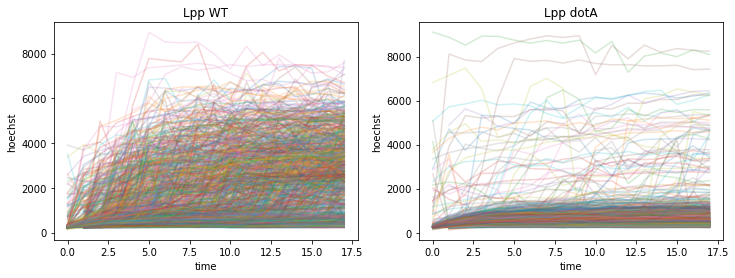

In [10]:
column_to_plot = 'hoechst'

fig, axs = plt.subplots(1,2, figsize=(12,4)) # figure with rows=2, column=1. 
#axs is a list of axes [ax1,ax2,...]

# read a bit on the python "zip" function. It basically pairs elements from 2 lists A, B:
# zip(A,B) -> [(a1,b1),(a2,b2)...]. We can loop over such pairs (ai, bi):

for ax, strain in zip(axs, strains): # combine axis and strains: [(axs[0], strains[0]), (axs[1], strains[1]), ...]
    _df = df_selected[ df_selected['bact']==strain ] # subset of the data with current strain
    ax.set_title(strain) # set axis title
    ax.set_ylabel(column_to_plot)
    ax.set_xlabel('time')
    for k, v in _df.groupby('cell_lbl').groups.items(): # group the data by individual cells. 
        # This is needed to color each track individually
        _df = df.loc[v] # subset of data that has only one cell
        ax.plot( _df['t'], _df[column_to_plot], alpha=0.2)


In [11]:
# we can make a function out of it:
def plot_feature(df, column_to_plot, alpha=0.1):

    strains = df['bact'].unique()
    strains_n = len(strains)
    ax_w,ax_h = 6,4  # axis width, height
    fig, axs = plt.subplots(1, strains_n, figsize=(ax_w*strains_n, ax_h))
    
    for ax, strain in zip(axs, strains):
        _df = df[ df['bact']==strain ] # _df with current strain
        ax.set_title(strain) 
        ax.set_ylabel(column_to_plot)
        ax.set_xlabel('time')
        for k, v in _df.groupby('cell_lbl').groups.items(): # group the data by individual cells. 
            # This is needed to color each track individually
            # k = group name, v = indices of the group. Note that indices correspond to those from the FULL df, not _df
            _df = df.loc[v] # subset of data that has only one cell (the _df reference from above is lost!)
            ax.plot( _df['t'], _df[column_to_plot], alpha=alpha)


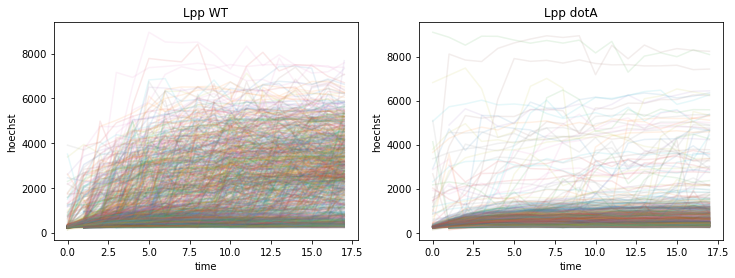

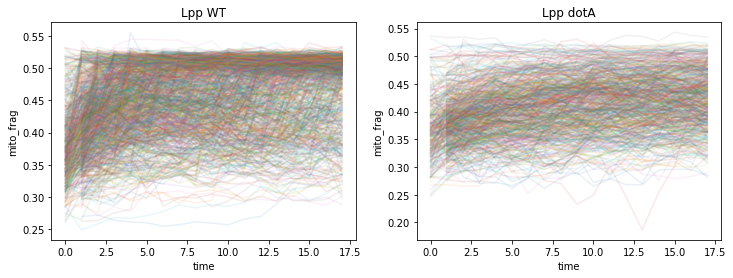

In [12]:
# this command is to make sure the plot is non-interactive
# read the chapter "5. IPython Magic Commands" here (https://www.dataquest.io/blog/alt-jupyter-notebook-tips-tricks-shortcuts/)
# to find more about Jupyter notebooks tricks

%matplotlib inline
plot_feature( df_selected, 'hoechst')
plot_feature( df_selected, 'mito_frag')

# Statistical representations of the tracks popultaions
- Above we learned some ways of visualizing individual tracks 
- We can select individual tracks based on specified condition (track length, value thresholds, average signal value etc. (we did not implements the last two, but the idea how to do that should be clear by now))
- Looking at individual tracks gives some insights, but not very informative on the population level. 
- Let's try to visualize the signal dynamics on the population level
- Note: since there is a lot of tracks, calculating the stats and plotting the graph may take some time

# Seaborn
It is a very good library for plotting of data using pandas.
Look the examples here: https://seaborn.pydata.org/examples/index.html

In [13]:
# This is a function that controls transparency of some objects in matplotlib plots.
# If you are interested to find out more, have a look at matplotlib get_children() and set_alpha() functions
    
def set_alpha(ax, alpha):
    from matplotlib.collections import PolyCollection
    for art in ax.get_children():
        if isinstance(art, PolyCollection):
            art.set_alpha( alpha )

## Violin plots

Strains:  ['Lpp WT' 'Lpp dotA']
Cell track length thresholds (including both ends!): [18, 18]
Cells number (selected/all): 828 / 3989
Rows (selected/all): 14904 / 42598


<IPython.core.display.Javascript object>


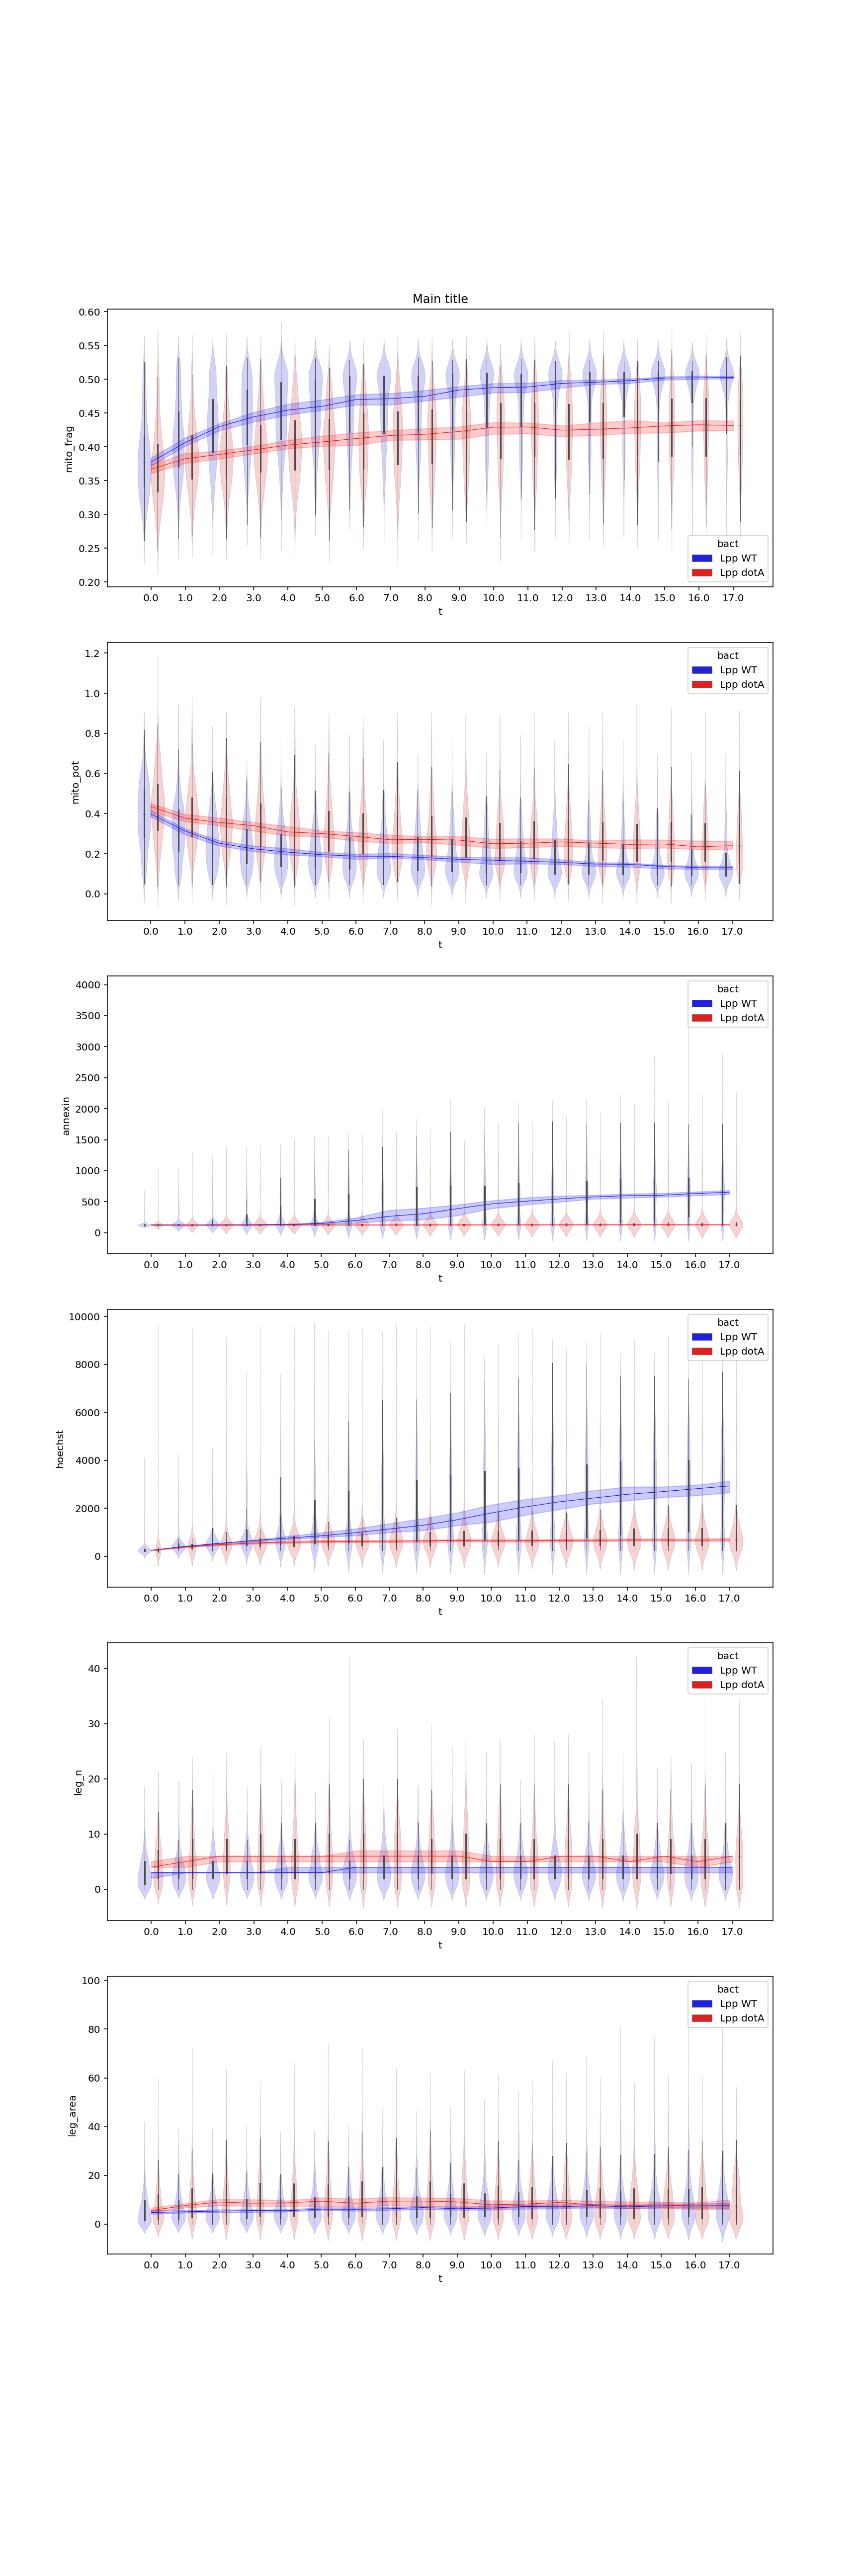

In [23]:
# data params

min_tr_length, max_tr_length = 18, 18
df_selected = select_tracks_by_length(df, min_tr_length, max_tr_length)

cur_strains = ['Lpp WT', 'Lpp dotA' ] # = cur_df['bact'].unique()
features    = ['mito_frag', 'mito_pot', 'annexin', 'hoechst', 'leg_n', 'leg_area' ] # = cur_df.columns


# let's make sure this plot is interactive (zoom, pan etc) eith this command:
%matplotlib notebook
# to make it non-interactive, type %matplotlib inline
# these commands can bug sometimes (e.g. if an interactive plot is empty - try to rerun the current section, or even 
# restart the kernel and rerun the whole notebook. Sometimes I need to rerun the current notebook section 3-4 times
# it it fails all the time, just make the plot non-interactive:
# %matplotlib inline


fig_width   = 12 
# depending on the number of features, the height of the figure should vary. We calculate it below.
# you can calcualate it in any way you want; I used this formula because I liked the figure proportions that I get with it.
fig, axs    = plt.subplots( len(features), 1, figsize=(fig_width, len(features)*fig_width/2))

# this dictionary will store value range (maxima) for each feature
violin_ylims = {}

for i,feat in enumerate( features ):  #read about enumerate". Basically, it numbers the elements: enumerate(V) -> [(0, v0),(1,v1),...]
    if i==0:
        axs[i].set_title( 'Main title' )
    # we will use seaborn library. Read about "violinplot" in seaborn. 
    # It will plot smooth PDF (probability distribution function) of data found in EACH time point (convenient!)
    # The PDF is calculated using method KDE (kernel density estimation). These PDFs are drawn vertically and they
    # look like violins in this case, thus the violinplot
    sns.violinplot( data=df_selected, x='t', y=feat, # data, what x and what y to use.
                   hue='bact', palette=['blue','red' ], # hue = split data by these groups; palette = which colors to use for each group
                   ax=axs[i], linewidth=0.5)
    
    # We want now to average the distributions in each time point and draw a curve passing through these averages.
    # this way we will see the signal dynamics on average.
    # we use the command "lineplot" with an optino "estimator=funcion", where you can even provide your own function.
    # this function should somewhow calculate the average of a distribution. In this case I'm using
    # existing function from numpy library: "median". You may also try "mean"
    # The "mean" is more sensitive to outliers and thus often gives wrong curves compared to "median"
    sns.lineplot( data=df_selected, x='t', y=feat, 
                 hue='bact', palette=['blue','red'],
                 estimator=np.median, # Estimator on how to calculate the line. Can be mean, median etc.
                 ax=axs[i], linewidth=0.5, legend=False) 

    # give some transparency to the objects in the axes:
    set_alpha( axs[i], 0.2)
    
    # accumulate ylimits (maximum values) for each axes
    # violin_ylims[feat] = axs[i].get_ylim()

    
# you can try to zoomin, zoomout and pan on this figure.

## Another Violin plot
- In the plot above we split the data on the strain: WT vs dotA.
- Let's now split the data on different aspect: infected vs non-infected.


Strains:  ['Lpp WT' 'Lpp dotA']
Cell track length thresholds (including both ends!): [18, 18]
Cells number (selected/all): 828 / 3989
Rows (selected/all): 14904 / 42598


Text(0.5, 1.0, "strains['Lpp WT', 'Lpp dotA']-length[18,18]-violins")

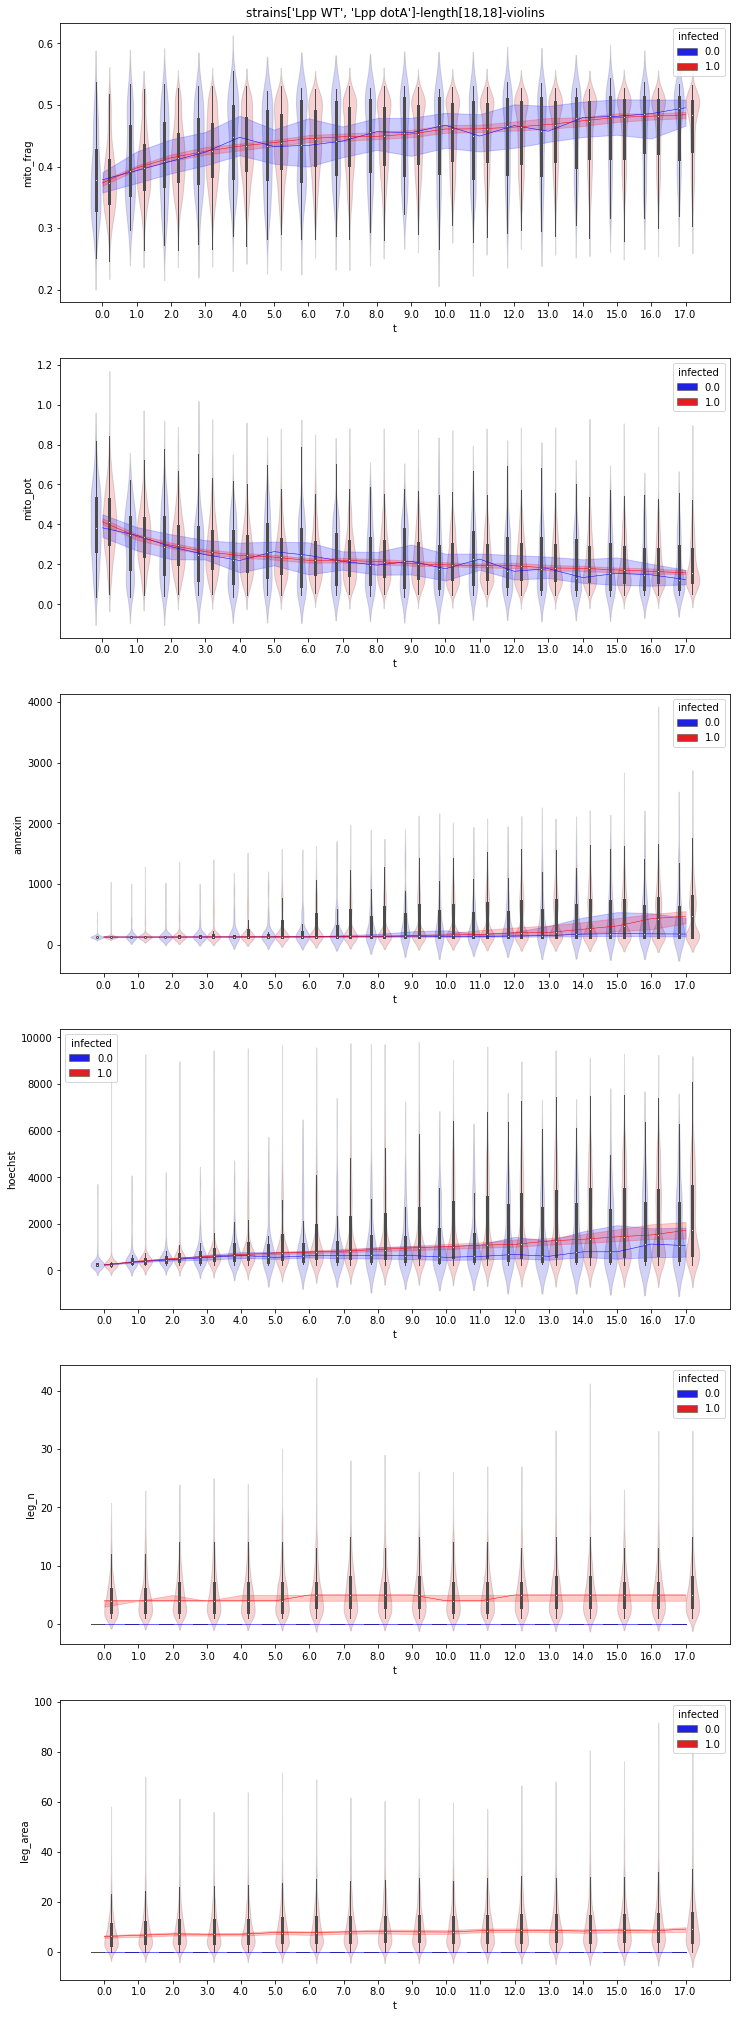

In [15]:
# data params
min_tr_length, max_tr_length = 18, 18
df_selected = select_tracks_by_length(df, min_tr_length, max_tr_length)

cur_strains = ['Lpp WT', 'Lpp dotA' ] # = cur_df['bact'].unique()
features    = ['mito_frag', 'mito_pot', 'annexin', 'hoechst', 'leg_n', 'leg_area' ] # = cur_df.columns



%matplotlib inline

fig_width   = 12
title       = 'strains%s-length[%d,%d]-violins'%(cur_strains, min_tr_length, max_tr_length )


fig, axs = plt.subplots( len(features), 1, figsize=(fig_width, len(features)*fig_width/2) )

for i,feat in enumerate( features ): 
    sns.violinplot( data=df_selected, x='t', y=feat, 
                    hue='infected', palette=['blue','red'],
                    ax=axs[i], linewidth=1) 
    
    sns.lineplot( data=df_selected, x='t', y=feat, 
                    hue='infected', palette=['blue','red'],
                    estimator=np.median,
                    ax=axs[i], linewidth=0.5, legend=False) 

    set_alpha( axs[i], 0.2)

axs[0].set_title( title )


##  DENSITY PLOTS


In [16]:
# these functions will be needed to control the intensity of the images.
# the problem is that some parts of the plots will be very dim, some very bright.
# it will be difficult to see the details. To avoid that ,we rescale the intensities in Log or Power manner.
from matplotlib.colors import LogNorm, PowerNorm

# intensity rescaling ( param for PowerNorm)
gamma = 0.5


Strains:  ['Lpp WT' 'Lpp dotA']
Cell track length thresholds (including both ends!): [18, 18]
Cells number (selected/all): 828 / 3989
Rows (selected/all): 14904 / 42598


Text(0.5, 1.0, "strains['Lpp WT', 'Lpp dotA']-length[18,18]-density2d-gamma0.50")

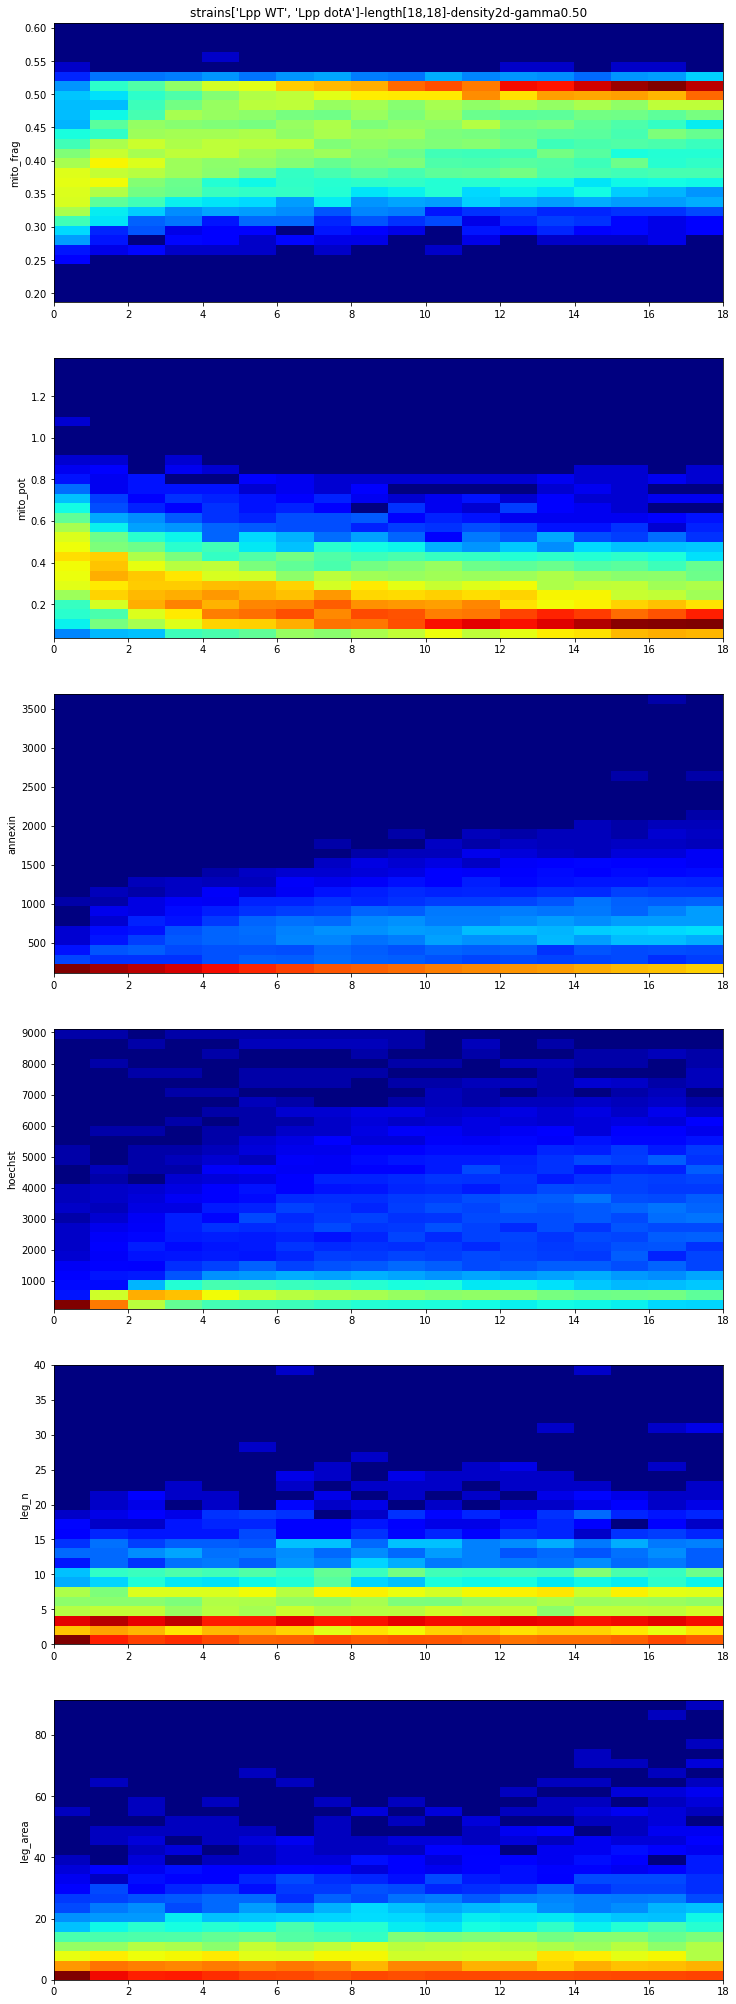

In [17]:
# as above, you may select the data as you wish. Here I'm using the existing dataframe "df_selected"
min_tr_length, max_tr_length = 18, 18
df_selected = select_tracks_by_length(df, min_tr_length, max_tr_length)


# We are going to make density plot, which is somewhat like histogram, but in 2D.
xbins = np.arange(0, 19, 1)
# range will output an array [0,1,...,18]
# We have 18 frames (0,17), but xbins is 19 elements!
# This is because xbins is bin edges (thus they are +1 more than actual number of bin centers)

Nbins = 30 # number of bins in Y dimension (acts for each feature)
ybins = {} # dictionary with bins for each feature
for f in features:
    ymin, ymax = df[f].min(), df[f].max() # minimum and maximum for this given feature.
    # note that we are taking those values from the original DF, not from the selected.
    ybins[f] = np.linspace( ymin, ymax, Nbins )
    # linspace gives evenly spaced array between ymin and ymax. Number of elements is Nbins.


# fig params
fig_width   = 12
title       = 'strains%s-length[%d,%d]-density2d-gamma%0.2f'%(cur_strains, min_tr_length, max_tr_length, gamma )

%matplotlib inline
fig, axs = plt.subplots( len(features), 1,
                        figsize=(fig_width, len(features)*fig_width/2),
                       )

for i,feat in enumerate( features ): 
    # we use "values" because hist2D did not wokr on Series (in my hands)
    axs[i].hist2d( df_selected['t'].values, df_selected[feat].values,
                  bins=(xbins, ybins[feat]), cmap=plt.cm.jet,
                  norm=PowerNorm(gamma) # Try to comment this line and see how we cannot see the details in the plot without intensity rescaling
                 )
    
    # in this figure we have to control the font explicity, because I changed default DPI setting above (dots per inches)
    # resolution changed, therefore I have to control the fontsize manually... Not convenient, perhaps they will change it in future.
    axs[i].set_ylabel( feat)
    axs[i].set_ylim( [df[feat].min(), df[feat].max()] ) # set min and max value on the axis. Take them from the FULL dataframe
    # axs[i].spines['top'].set_visible(True)
    # axs[i].spines['right'].set_visible(True)
    
axs[0].set_title( title )

# you may also want to save this figure:
# file_path = './2d_histograms.png'
# fig.savefig( file_path, dpi=300)

# Red color -> more tracks in this bin
# Blue color -> less tracks in this bin

# Cross correlations
- Let's look at 2 different features and see how theyr dynamics is related.
- Read a bit on correlation (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

Strains:  ['Lpp WT' 'Lpp dotA']
Cell track length thresholds (including both ends!): [18, 18]
Cells number (selected/all): 828 / 3989
Rows (selected/all): 14904 / 42598


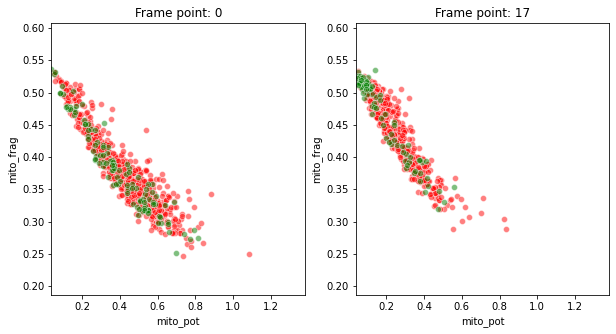

In [18]:
# select data subset
min_tr_length, max_tr_length = 18, 18
df_selected = select_tracks_by_length(df, min_tr_length, max_tr_length)


# features to plot in cross corr plot
f1, f2 = 'mito_pot', 'mito_frag'
# f1, f2 = 'hoechst', 'annexin'
# min-max for each feature; take from the FULL dataframe
f1_min, f1_max = df[f1].min(), df[f1].max()
f2_min, f2_max = df[f2].min(), df[f2].max()

# let's also split the data by time: one panel for frame=0 and another panel for frame=17
fig,axs = plt.subplots(1, 2, figsize=(10,5))

for ax, cur_frame in zip(axs, [0,17]):
    
    # select a subset: infected + given frame
    inf_inds    = ((df_selected['infected']==1) &
                   (df_selected['t']==cur_frame) )
    
    # select a subset: noninfected + given frame
    noninf_inds = ((df_selected['infected']==0) &
                   (df_selected['t']==cur_frame) )

    # red circles for infected
    sns.scatterplot(data=df_selected[inf_inds], x=f1, y=f2,
                    ax=ax, color='r', alpha=0.5)
    # green circles for noninfected
    sns.scatterplot(data=df_selected[noninf_inds], x=f1, y=f2,
                    ax=ax, color='g', alpha=0.5)

    ax.set_xlim([f1_min, f1_max ])
    ax.set_ylim([f2_min, f2_max ])
    ax.set_title('Frame point: %d'%cur_frame)
    
# It is clear that mito_frag and mito_pot are strongly negatively correlated
# It seems there is almost no difference between frame 0 and 17


# Let's plot correlations in each frame

In [19]:
# generate array with 18 colors: one color for each time point
cols = sns.color_palette("hls", 18)
cols = [plt.cm.get_cmap('jet',18)(i) for i in range(18)]

# %matplotlib inline
# sns.color_palette("hls", 8)


Strains:  ['Lpp WT' 'Lpp dotA']
Cell track length thresholds (including both ends!): [18, 18]
Cells number (selected/all): 828 / 3989
Rows (selected/all): 14904 / 42598


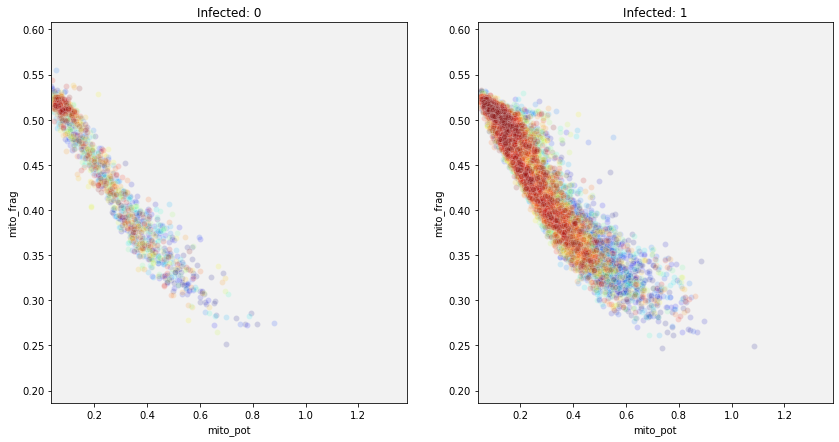

In [20]:
min_tr_length, max_tr_length = 18, 18
df_selected = select_tracks_by_length(df, min_tr_length, max_tr_length)

# features to plot in cross corr plot
f1, f2 = 'mito_pot', 'mito_frag'
# f1, f2 = 'hoechst', 'annexin'
# min-max for each feature; take from the FULL dataframe
f1_min, f1_max = df[f1].min(), df[f1].max()
f2_min, f2_max = df[f2].min(), df[f2].max()



fig,axs = plt.subplots(1, 2, figsize=(14,7))

for ax, infected_bool in zip(axs, [0,1]):
    
    ax.set_xlim([f1_min, f1_max ])
    ax.set_ylim([f2_min, f2_max ])
    ax.set_facecolor( (0.95, 0.95,0.95) ) # a bit darker background color for better contrast
    ax.set_title('Infected: %s'%infected_bool)
    
    for cur_frame, c in zip(range(18), cols):
        inds    = ((df_selected['infected']==infected_bool) & (df_selected['t']==cur_frame) )
        sns.scatterplot(data=df_selected[inds], x=f1, y=f2,
                        ax=ax, color=c, alpha=0.15)

# There is a difference between the cross corr in infected and noninfected cells